# Modèle de Classification detection d'anomalies

https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/

https://www.youtube.com/watch?v=c5V7gSTxS_0

## 1. Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Dataset metrics

In [2]:
# nom de fichier et chemin relatif
filename = 'metrics.csv'
path = '../data/'
# création d'un dataframe à partir du csv de données
df = pd.read_csv(path+filename, index_col=0)
df.head(2)

,status,created_at,cyan_capacity,cyan_remaining,magenta_capacity,magenta_remaining,yellow_capacity,yellow_remaining,black_capacity,black_remaining,machineId,connected_operators,varnishLevelsTargetvolume,varnishLevelsTotalvolume,modules,events
id,,,,,,,,,,,,,,,,
5561325,WARNING,2022-06-07 12:23:52.164000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""JAN"", ""level"": ""Operator""}]",22050.818386,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
5513803,IDLE,2022-06-03 08:44:57.996000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1164430 entries, 5561325 to 10909319
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   status                     1164430 non-null  object 
 1   created_at                 1164430 non-null  object 
 2   cyan_capacity              0 non-null        float64
 3   cyan_remaining             0 non-null        float64
 4   magenta_capacity           0 non-null        float64
 5   magenta_remaining          0 non-null        float64
 6   yellow_capacity            0 non-null        float64
 7   yellow_remaining           0 non-null        float64
 8   black_capacity             0 non-null        float64
 9   black_remaining            0 non-null        float64
 10  machineId                  1164430 non-null  int64  
 11  connected_operators        1164430 non-null  object 
 12  varnishLevelsTargetvolume  1164430 non-null  float64
 13  varni

In [6]:
df.reset_index(level=None, drop=True, inplace=True, col_level=0, col_fill='')
df = df.dropna(axis=1)

In [7]:
df.head(2)

,status,created_at,machineId,connected_operators,varnishLevelsTargetvolume,varnishLevelsTotalvolume,modules,events
0,WARNING,2022-06-07 12:23:52.164000,14,"[{""name"": ""JAN"", ""level"": ""Operator""}]",22050.818386,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]
1,IDLE,2022-06-03 08:44:57.996000,14,"[{""name"": ""Viktor"", ""level"": ""Operator""}]",22402.256226,100000,"[{""sn"": """", ""name"": ""Print Engine 1"", ""type"": ...",[]


In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Audrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Audrey\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
str_ = df.modules.loc[0]

In [36]:
words_in_quote = word_tokenize(str_)

In [32]:
words = [word.lower() for word in words_in_quote if word.isalpha() or word.isnumeric()]
print(words)

['sn', 'name', 'print', 'engine', '1', 'type', 'varnish', 'printer', 'counters', 'name', 'varnish', 'counter', 'value', '1965087', 'generation', 'sn', 'name', 'ifoil', 'l', 'type', 'ifoil', 'counters', 'name', 'total', 'pages', 'counter', 'value', '63822', 'name', 'foiled', 'pages', 'counter', 'value', '36211', 'generation', '2']


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialiser le vecteur TF-IDF
tf_idf_vector = TfidfVectorizer()
# Vectoriser les mots
word_vector = tf_idf_vector.fit_transform(words)
# Afficher le vecteur résultant
print(word_vector.toarray())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.

In [ ]:
def vectorize_serie(serie):
    tokens = word_tokenize(serie)
    words = [word.lower() for word in word_tokenize(serie) if word.isalpha() or word.isnumeric()]
    word_vector = tf_idf_vector.fit_transform(words)
    return word_vector

In [37]:
module_df = df.modules.apply(lambda x : [word.lower() for word in word_tokenize(x) if word.isalpha() or word.isnumeric()])

In [38]:
module_df

0          [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
1          [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
2          [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
3          [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
4          [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
                                 ...                        
1164425    [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
1164426    [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
1164427    [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
1164428    [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
1164429    [[, {, ``, sn, '', :, ``, '', ,, ``, name, '',...
Name: modules, Length: 1164430, dtype: object

In [27]:
# # on encode les variables catégorielles
# encoded_df = df.drop(['timestamp','name_connected_operators'], axis=1).copy()
# object_columns = list(encoded_df.select_dtypes(include=['object']).columns)
# for col in object_columns :
#     index = 1
#     col_dict = {}
#     for value in list(encoded_df[col].unique()):
#         col_dict[value] = index
#         index += 1
#     encoded_df[col].replace(col_dict, inplace=True)
#     encoded_df[col] = pd.to_numeric(encoded_df[col]).astype('int64')
# encoded_df

In [28]:
# visualisation du df encoded avec matrice de correlation
# corr_matrix = encoded_df.corr(numeric_only=True, method ='pearson')
# sns.heatmap(corr_matrix)
# plt.show()

In [29]:
# visualisation du df encoded par paire
# sns.pairplot(encoded_df[["type_modules", "criticality_events"]])

In [30]:
#sns.pairplot(encoded_df, hue='criticality_events', diag_kind="hist", corner=True, x_vars=["varnishLevelsTargetvolume", "varnishLevelsTotalvolume ", "criticality_events"])

## 3. Daframe jobs uses Ifoil

In [31]:
jobs_df = pd.read_csv('../data/jobs/jobs_uses_ifoil_df.csv', index_col=0)
jobs_df.head(2)

,id,total_copies,started_at,ended_at,speed,operator,operator_level,paperHeight,paperWidth,jobId,total_copies_requested
0,6191,0,2021-06-29 14:14:56.792000+00:00,2021-06-29 14:14:58.759000+00:00,313,1,1,520,740,1624976096,1
1,6192,2,2021-06-29 14:15:16.235000+00:00,2021-06-29 14:20:17.203000+00:00,313,1,1,520,740,1624976116,25


## 4. Dataframe metrics Ifoil

In [43]:
ifoil_df = df[df.type_modules == 'iFoil']
ifoil_df = ifoil_df[ifoil_df.source_events == 'iFoil']

In [ ]:
# ifoil_col_to_drop = ['type_modules',
#                      'name_counters_modules',
#                      'name_connected_operators',
#                      'level_connected_operators',
#                      'source_events',
#                      'timestamp',
#                      'identification_events',
#                      'varnishLevelsTargetvolume',
#                      'varnishLevelsTotalvolume']
# ifoil_df = ifoil_df.drop(ifoil_col_to_drop, axis=1)

## 5. Merge dataframes Ifoil

In [55]:
df_1 = ifoil_df.copy() # df with timestamp
df_1["timestamp"] = pd.to_datetime(df_1["timestamp"]).astype('int64')

df_2 = jobs_df.copy() # df with time period
df_2["started_at"] = pd.to_datetime(df_2["started_at"]).astype('int64')
df_2["ended_at"] = pd.to_datetime(df_2["ended_at"]).astype('int64')

compare = (df_2[["started_at"]].values < df_1.timestamp.values) & (df_2[["ended_at"]].values > df_1.timestamp.values)

## get cell numbers which is in range 0 to matrix size which meets the condition
ind = np.arange(len(df_1)*len(df_2))[compare.ravel()]

## calculate row and column index from cell number
merge_df = pd.concat([df_2.iloc[ind//len(df_1)].reset_index(drop=True), df_1.iloc[ind%len(df_1)].reset_index(drop=True)], axis=1, sort=False)

In [ ]:
# # liste des valeurs uniques par colonne si moins de 10
# for col in merge_df.columns:
#     if merge_df[col].nunique() <= 10 :
#         print(col, merge_df[col].unique())

In [56]:
merge_df = merge_df.drop(['id',
               'started_at',
               'ended_at',
               'operator',
               'operator_level',
               'jobId',
               'type_modules',
               'name_counters_modules',
               'name_connected_operators',
               'level_connected_operators', 
               'source_events', 
               'timestamp',
               'identification_events',
               'varnishLevelsTargetvolume',
               'varnishLevelsTotalvolume'],
               axis=1)

In [57]:
merge_df.columns

Index(['total_copies', 'speed', 'paperHeight', 'paperWidth',
       'total_copies_requested', 'value_counters_modules',
       'criticality_events'],
      dtype='object')

## 6. Visualisation dataframe Ifoil

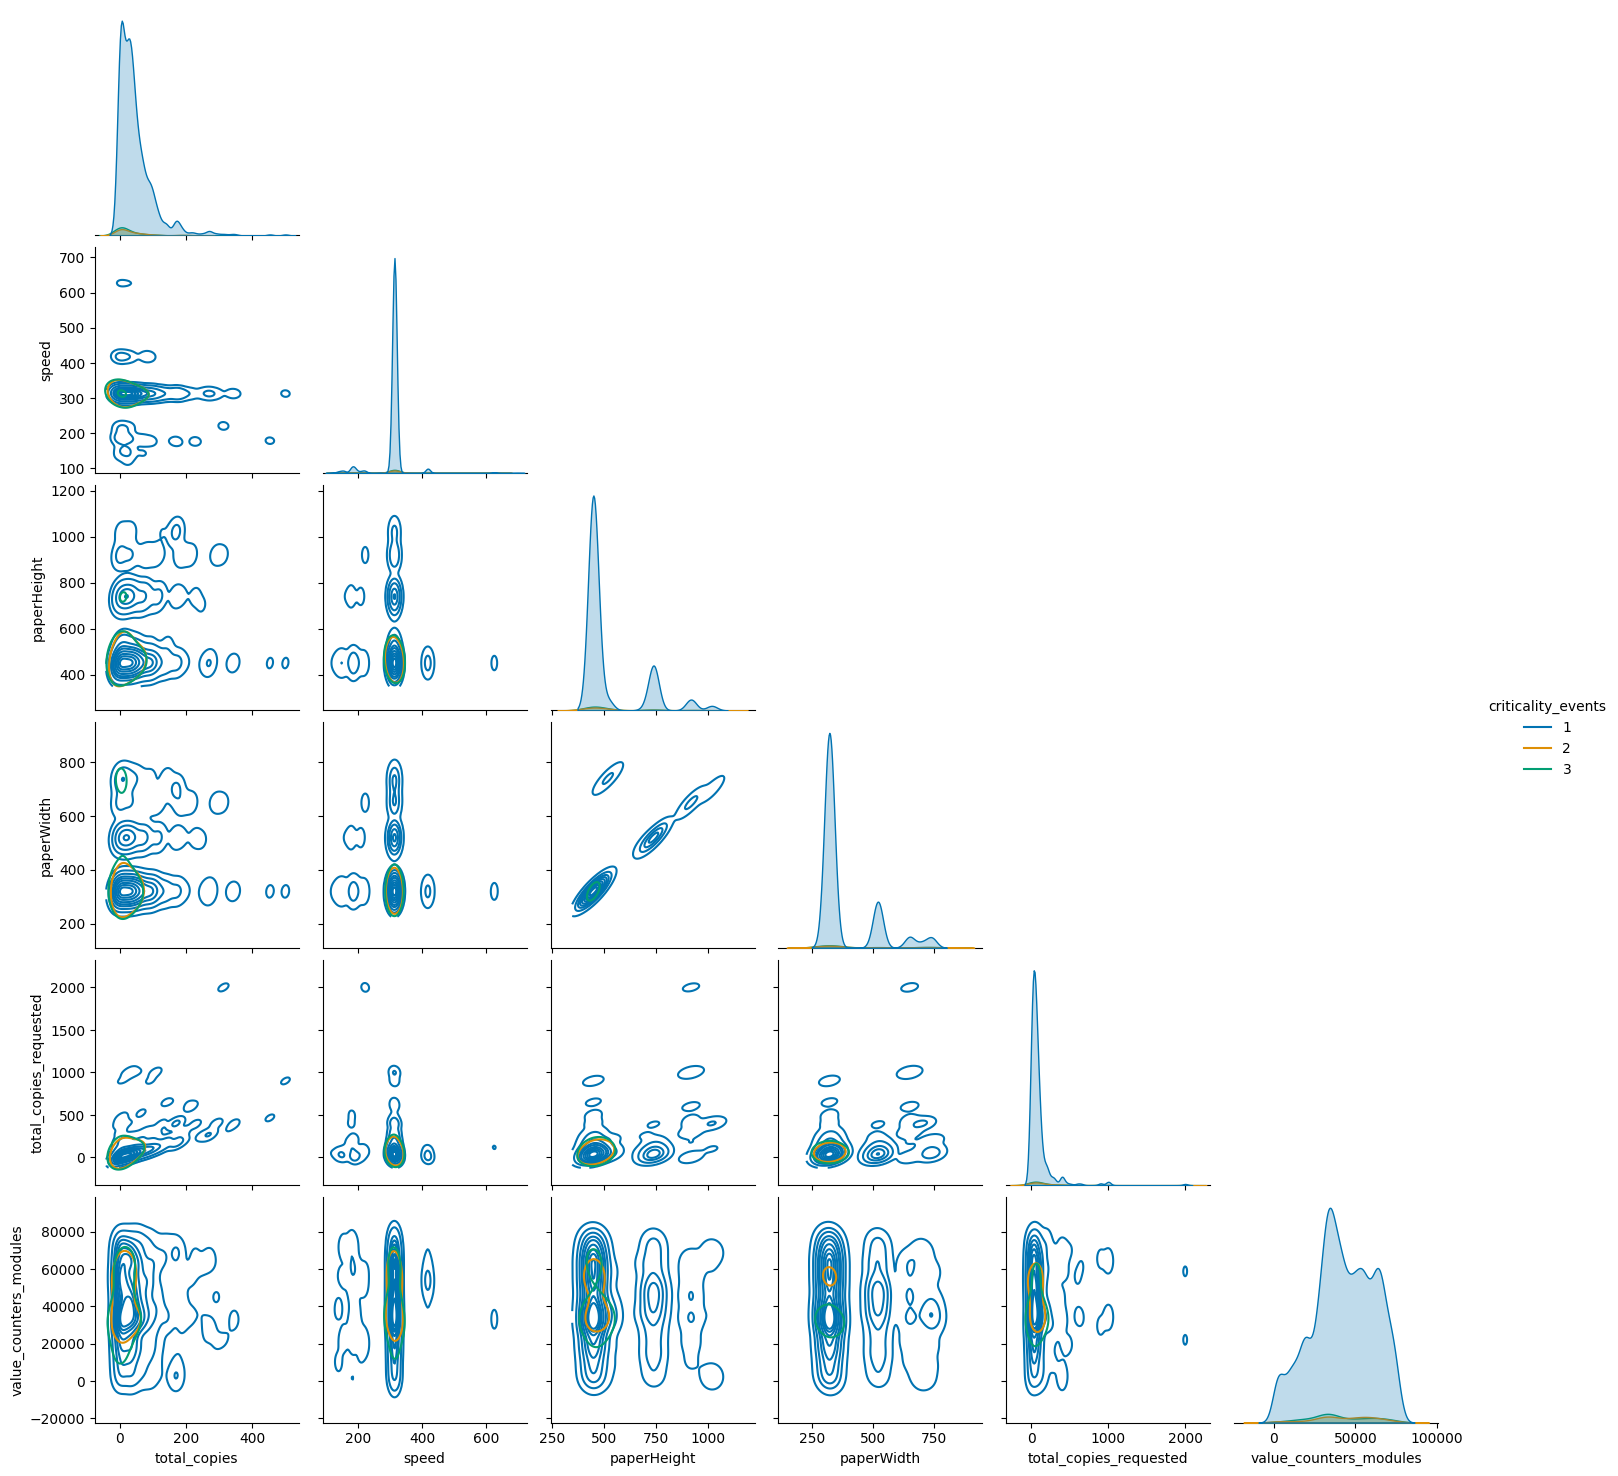

In [59]:
sns.pairplot(merge_df, hue='criticality_events', corner=True, kind='kde', palette='colorblind')

In [ ]:
# # Generate a Boxplot
# ifoil_df['value_counters_modules'].plot(kind='box')
# plt.xlabel('iFoil Module Counter')
# plt.show()

# # Generate a Histogram plot
# ifoil_df['value_counters_modules'].plot(kind='hist')
# plt.xlabel('iFoil Module Counter')
# plt.show()

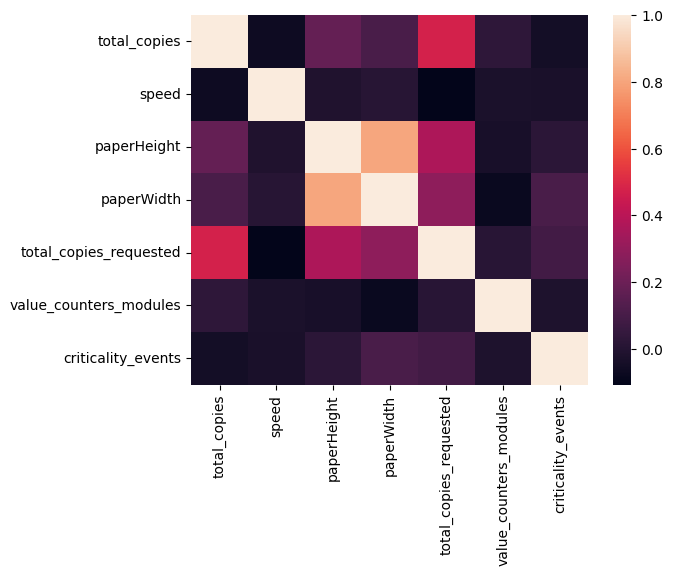

In [61]:
# visualisation avec matrice de correlation
corr_matrix = merge_df.corr(numeric_only=True, method ='pearson')
sns.heatmap(corr_matrix)
plt.show()

In [ ]:
# # Convert the salary values to a numpy array
# salary_raw = df['value_counters_modules'].values
# # For compatibility with the SciPy implementation
# salary_raw = salary_raw.reshape(-1, 1)
# salary_raw = salary_raw.astype('float64')
# # Import kmeans from SciPy
# from scipy.cluster.vq import kmeans
# from scipy import cluster
# # Specify the data and the number of clusters to kmeans()
# centroids, avg_distance = kmeans(salary_raw, 4)
# # Get the groups (clusters) and distances
# groups, cdist = cluster.vq.vq(salary_raw, centroids)
# plt.scatter(salary_raw, np.arange(0,100), c=groups)
# plt.xlabel('value_counters_modules')
# plt.ylabel('criticality_events')
# plt.show()